In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import copy#

In [22]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=False)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))

train_dataset size: 60000 
test_dataset size: 10000


In [23]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=600, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

In [24]:
class M1(nn.Module):
    def __init__(self):
        super(M1, self).__init__()
        
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [25]:
class M2(nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [26]:
class M3(nn.Module):
    def __init__(self,):
        super(M3, self).__init__()

        self.fc1 = nn.Linear(784, 250)
        self.fc2 = nn.Linear(250, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [27]:
class M4(nn.Module):
    def __init__(self,):
        super(M4, self).__init__()

        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [28]:
class M5(nn.Module):
    def __init__(self,):
        super(M5, self).__init__()
        
        self.fc1 = nn.Linear(784, 550)
        self.fc2 = nn.Linear(550, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [29]:
class M6(nn.Module):
    def __init__(self,):
        super(M6, self).__init__()

        self.fc1 = nn.Linear(784, 750)
        self.fc2 = nn.Linear(750, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [30]:
class M7(nn.Module):
    def __init__(self,):
        super(M7, self).__init__()

        self.fc1 = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
        

In [31]:
class M8(nn.Module):
    def __init__(self,):
        super(M8, self).__init__()
        
        self.fc1 = nn.Linear(784, 1050)
        self.fc2 = nn.Linear(1050, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [32]:
class M9(nn.Module):
    def __init__(self,):
        super(M9, self).__init__()

        self.fc1 = nn.Linear(784, 1500)
        self.fc2 = nn.Linear(1500, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [33]:
class M10(nn.Module):
    def __init__(self,):
        super(M10, self).__init__()

        self.fc1 = nn.Linear(784, 2000)
        self.fc2 = nn.Linear(2000, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [34]:
# Hyper-parameters 
input_size = 784 # 28x28
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
num_epochs = 10
dropout = 0.25
#weight_decay_val = 1e-4

In [35]:
#train function
def trainFunc(model,num_epochs):
    model.train()
    n_total_steps = len(train_loader)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    trainAvgLoss = []
    #trainAvgAcc = []
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        lossSum = 0
        #accSum=0
        for i, (images, labels) in enumerate(train_loader):  
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            lossSum += loss.detach().numpy()
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples
            #accSum += acc

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy : {acc} %', end = '\r', flush=True)
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                #print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %')
                train_acc.append(acc)


                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False
                        
        trainAvgLoss.append(lossSum/n_total_steps)
        
        
        print(f'For epoch {epoch} AVG_LOSS: {trainAvgLoss[epoch-1]:.4f}',end = '\r', flush=True)
    return train_epoch,train_losses,train_acc,trainAvgLoss

In [36]:
len(train_loader)

100

In [37]:
# Test function
# In test phase, we don't need to compute gradients (for memory efficiency)
def testFunc(model): 
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        testLoss = 0
        count = 0
        for images, labels in test_loader:
            prediction = model(images)
            tLoss = loss_func(prediction, labels)
            testLoss += tLoss
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            count += 1

        testLoss /= count
        netTest_acc1 = 100.0 * n_correct / n_samples

        print(f'Accuracy of the network:{model._get_name()} on the test images: {netTest_acc1:.2f} % & loss of the network:{testLoss:.4f}')
        return netTest_acc1,testLoss

In [38]:
modelArr = [M1,M2,M3,M4,M5,M6,M7,M8,M9,M10]
allTrainLossVal = {}
allTrainAccVal = {}
allTestLossVal = {}
allTestAccVal = {}
allModelParamNo = {}
for i in range (len(modelArr)):
        j = copy.deepcopy(i)
        torch.manual_seed(1)
        j = modelArr[i]()

        loss_func = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(j.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

        a=[]
        for k in j.parameters():
            a.append(torch.numel(k))
        modelTotalPrams = np.sum(a)
        print(f'Total no of parameters in Model{j._get_name()} :{modelTotalPrams}')

        train_epoch,train_losses,train_acc,trainAvgLoss = trainFunc(j,num_epochs)

        testAcc,testLoss = testFunc(j)

        allTrainLossVal[j._get_name()] = trainAvgLoss
        allTrainAccVal[j._get_name()] = train_acc
        allTestLossVal[j._get_name()] = testLoss
        allTestAccVal[j._get_name()] = testAcc     
        allModelParamNo[j._get_name()] = modelTotalPrams 

Total no of parameters in ModelM1 :39760
Max Epoch Reachedep [100/100], Loss: 0.1240, Accuracy : 95.58333333333333 %
Accuracy of the network:M1 on the test images: 95.24 % & loss of the network:0.1609
Total no of parameters in ModelM2 :79510
Max Epoch Reachedep [100/100], Loss: 0.0888, Accuracy : 96.75333333333333 %
Accuracy of the network:M2 on the test images: 96.45 % & loss of the network:0.1241
Total no of parameters in ModelM3 :198760
Max Epoch Reachedep [100/100], Loss: 0.0819, Accuracy : 98.02833333333334 %
Accuracy of the network:M3 on the test images: 97.22 % & loss of the network:0.0887
Total no of parameters in ModelM4 :397510
Max Epoch Reachedep [100/100], Loss: 0.0443, Accuracy : 98.77333333333333 %
Accuracy of the network:M4 on the test images: 97.60 % & loss of the network:0.0744
Total no of parameters in ModelM5 :437260
Max Epoch Reachedep [100/100], Loss: 0.0431, Accuracy : 98.84833333333333 %
Accuracy of the network:M5 on the test images: 97.71 % & loss of the network

In [53]:
#plot loss vs param
model_TrainLoss = [np.min(allTrainLossVal['M1']),np.min(allTrainLossVal['M2']),
              np.min(allTrainLossVal['M3']),np.min(allTrainLossVal['M4']),
              np.min(allTrainLossVal['M5']),np.min(allTrainLossVal['M6']),
              np.min(allTrainLossVal['M7']),np.min(allTrainLossVal['M8']),
              np.min(allTrainLossVal['M9']),np.min(allTrainLossVal['M10'])     
            ]
model_Tparams = [allModelParamNo['M1'],allModelParamNo['M2'],allModelParamNo['M3'],
                allModelParamNo['M4'],allModelParamNo['M5'],allModelParamNo['M6'],
                allModelParamNo['M7'],allModelParamNo['M8'],allModelParamNo['M9'],
                allModelParamNo['M10']
                ]
model_Testloss = [allTestLossVal['M1'],allTestLossVal['M2'],allTestLossVal['M3'],allTestLossVal['M4'],allTestLossVal['M5'],
                  allTestLossVal['M6'],allTestLossVal['M7'],allTestLossVal['M8'],allTestLossVal['M9'],allTestLossVal['M10']     
                ]



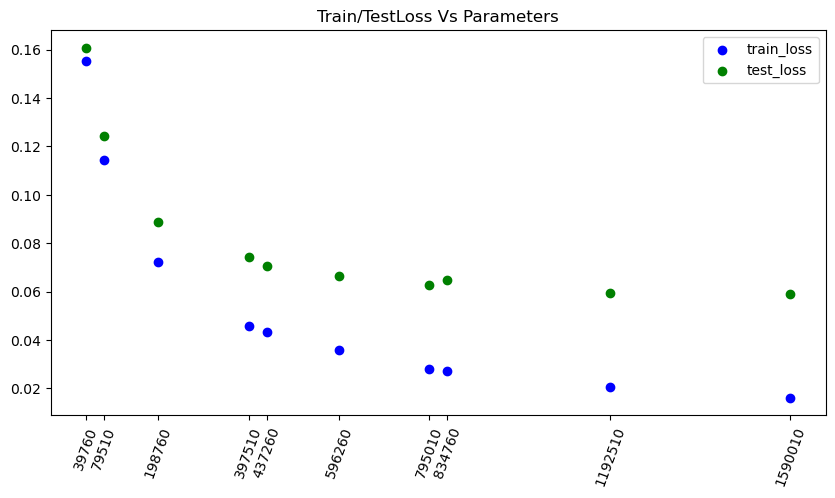

In [54]:
#Train/TestLoss Vs Param plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.scatter(model_Tparams,model_TrainLoss,color="blue")
plt.scatter(model_Tparams,model_Testloss,color="green")
plt.xticks(model_Tparams, model_Tparams,rotation=70)
plt.legend(['train_loss','test_loss'])
plt.title('Train/TestLoss Vs Parameters')

plt.show()

NameError: name 'model_TestLoss' is not defined

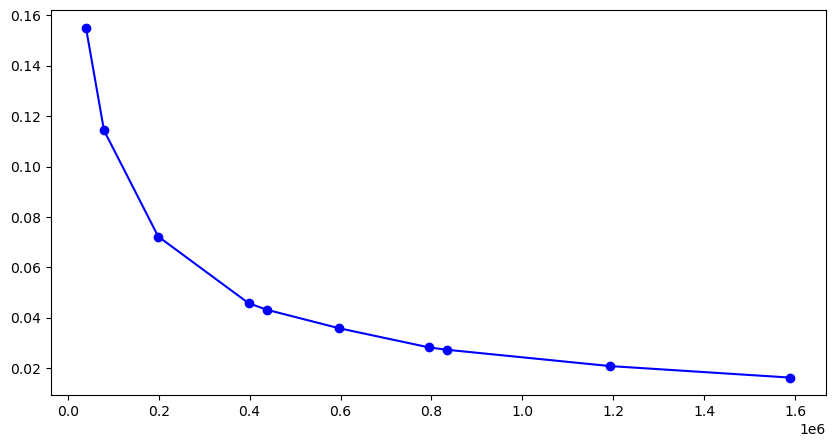

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(model_Tparams, model_TrainLoss, 'bo-', label='Train Loss')
plt.plot(model_Tparams, model_TestLoss, 'go-', label='Test Loss')
plt.xticks(model_Tparams, rotation=70)
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.title('Train/Test Loss vs Parameters')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
#plot Acc vs param
model_TrainAcc= [np.max(allTrainAccVal['M1']),np.max(allTrainAccVal['M2']),
              np.max(allTrainAccVal['M3']),np.max(allTrainAccVal['M4']),
              np.max(allTrainAccVal['M5']),np.max(allTrainAccVal['M6']),
              np.max(allTrainAccVal['M7']),np.max(allTrainAccVal['M8']),
              np.max(allTrainAccVal['M9']),np.max(allTrainAccVal['M10'])     
                ]
model_TestAcc = [allTestAccVal['M1'],allTestAccVal['M2'],allTestAccVal['M3'],allTestAccVal['M4'],allTestAccVal['M5'],
                  allTestAccVal['M6'],allTestAccVal['M7'],allTestAccVal['M8'],allTestAccVal['M9'],allTestAccVal['M10']     
                ]


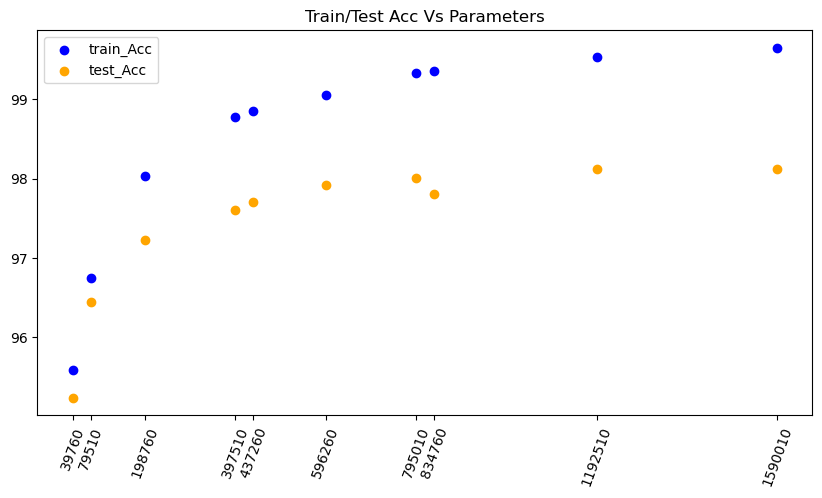

In [45]:
#Train/TestAcc Vs Param plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.scatter(model_Tparams,model_TrainAcc,color="blue")
plt.scatter(model_Tparams,model_TestAcc,color="orange")
plt.xticks(model_Tparams, model_Tparams,rotation=70)
plt.legend(['train_Acc','test_Acc'])
plt.title('Train/Test Acc Vs Parameters')
plt.show()

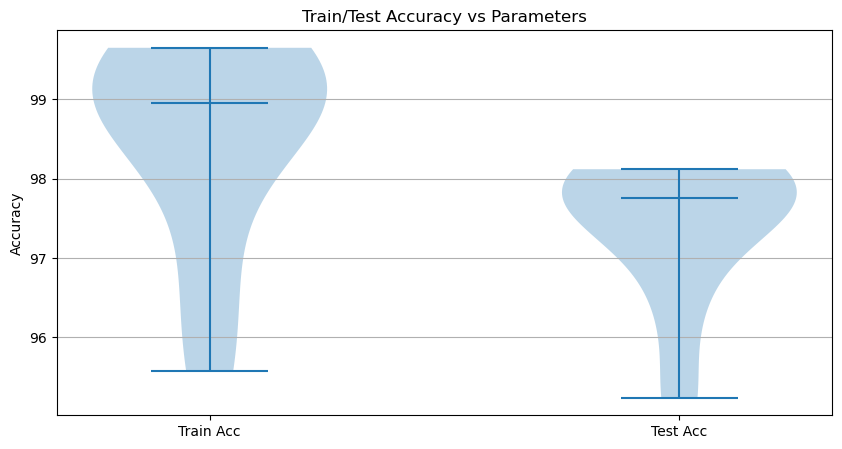

In [46]:
plt.figure(figsize=(10, 5))
plt.violinplot([model_TrainAcc, model_TestAcc], showmeans=False, showmedians=True)
plt.xticks([1, 2], ['Train Acc', 'Test Acc'])
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs Parameters')
plt.grid(axis='y')
plt.show()


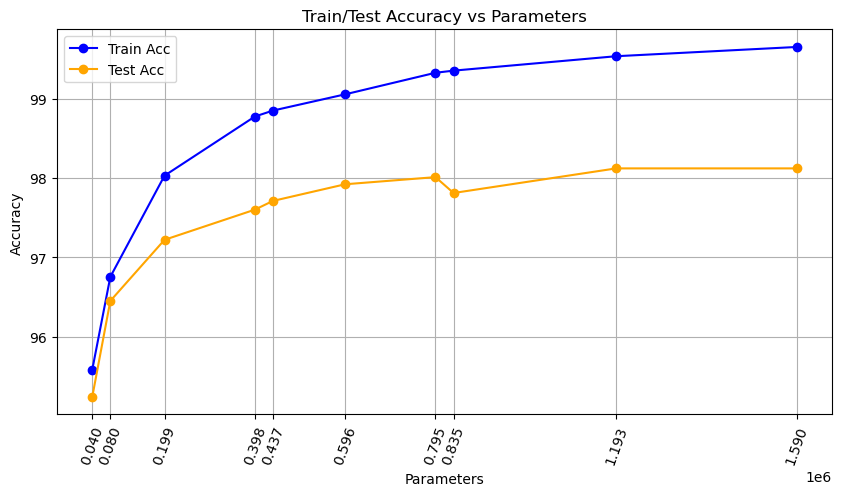

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(model_Tparams, model_TrainAcc, marker='o', color='blue', label='Train Acc')
plt.plot(model_Tparams, model_TestAcc, marker='o', color='orange', label='Test Acc')
plt.xticks(model_Tparams, rotation=70)
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs Parameters')
plt.legend()
plt.grid(True)
plt.show()
